In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
x = df.drop(columns=['Strength'])
y = df['Strength']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [12]:
ct = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(),X_train.columns)
])
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [13]:
# Applying Linear Regression without performing any transformations
clf = LinearRegression()

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

r2_score(y_test, y_pred)

0.627553179231485

In [14]:
clf = LinearRegression()
np.mean(cross_val_score(clf, x, y, scoring='r2'))

np.float64(0.4609940491662864)

In [15]:
temp = pd.DataFrame(X_train_scaled, columns=X_train.columns)
temp

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.160877,0.857387,0.982449,-0.314285,1.481654,-0.257462,-0.647520,-0.275673
1,1.308623,-0.602492,1.232598,-0.178192,0.391715,-1.926950,-0.273148,-0.275673
2,-0.076865,-0.855584,1.066874,-1.046371,0.626471,1.017859,0.066628,-0.689313
3,-0.291807,0.260321,0.357076,0.572666,0.307873,-1.761654,0.604093,-0.275673
4,-1.065038,-0.370108,1.112214,-1.102686,0.777385,1.363709,0.297676,-0.689313
...,...,...,...,...,...,...,...,...
819,0.027349,1.455604,-0.831134,-1.740915,0.844459,0.394821,0.390343,-0.689313
820,-0.340192,-0.855584,1.124721,-1.806615,0.978605,1.440000,0.355747,-0.507312
821,-0.865914,-0.855584,1.126285,-0.713178,0.626471,1.340822,0.331036,0.915611
822,1.783169,0.511112,-0.831134,-0.032713,0.458788,-1.544226,0.116050,-0.275673


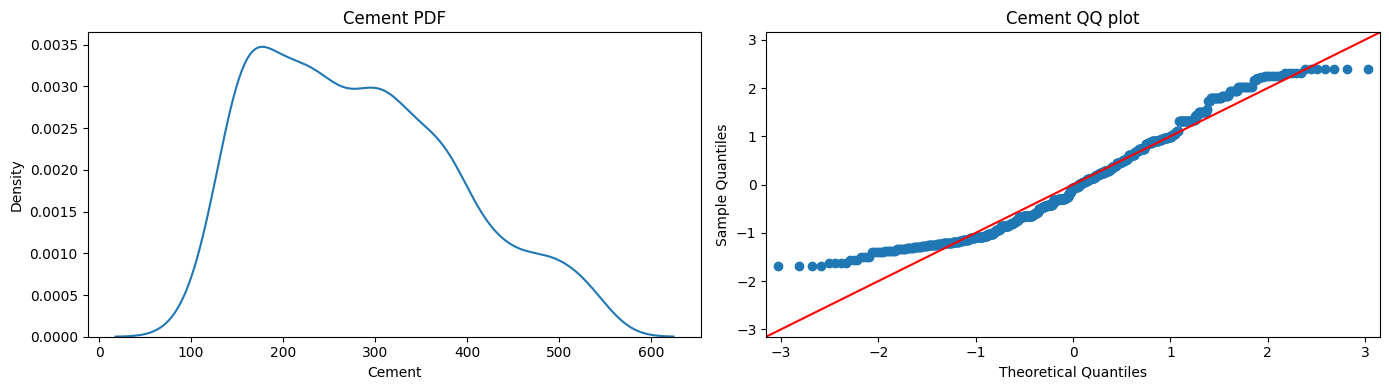

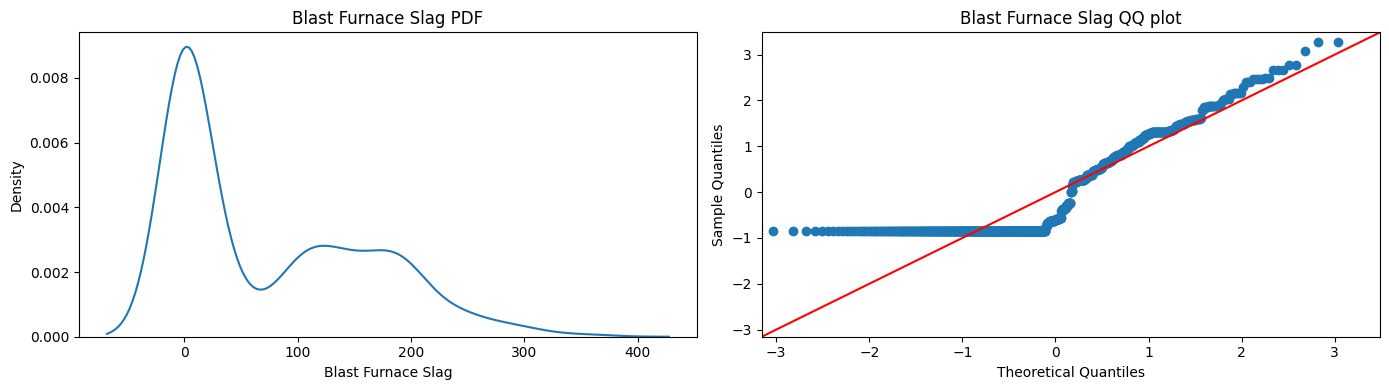

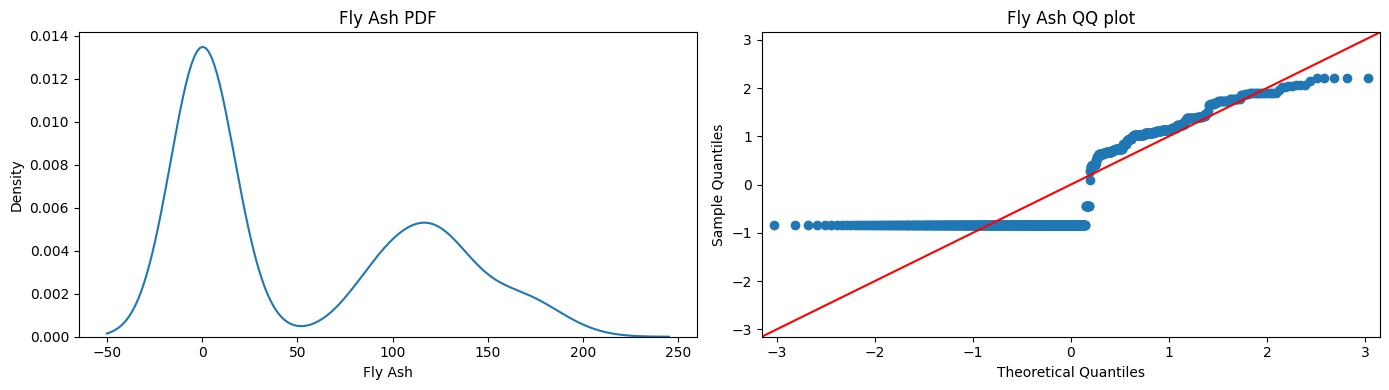

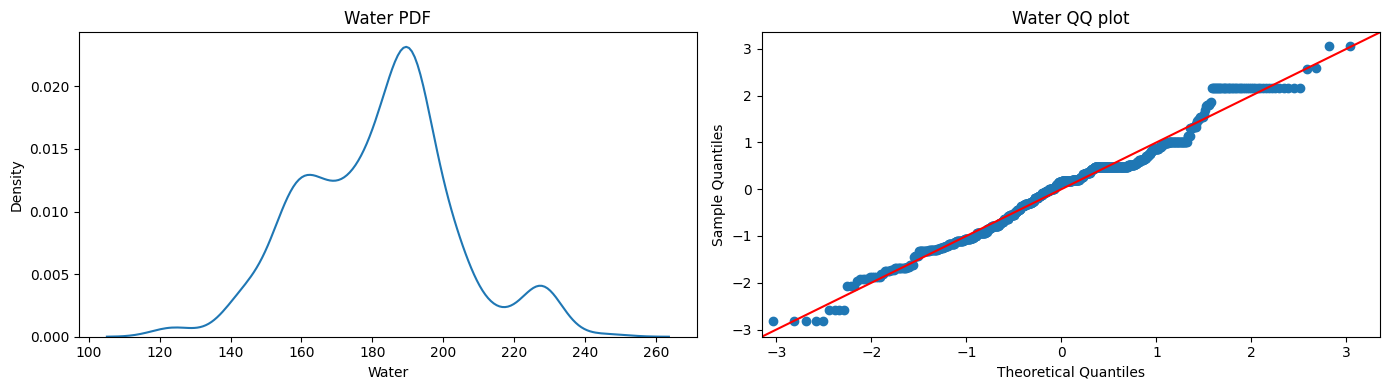

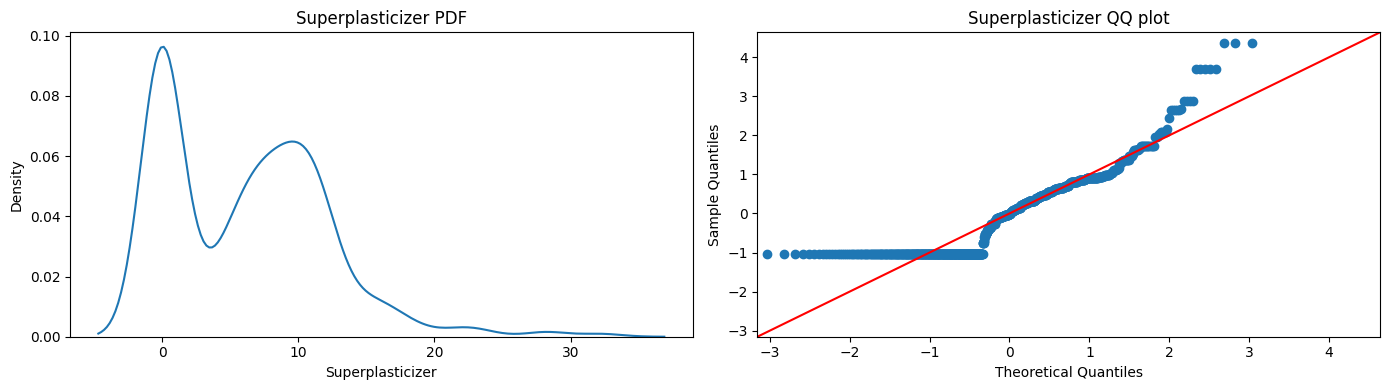

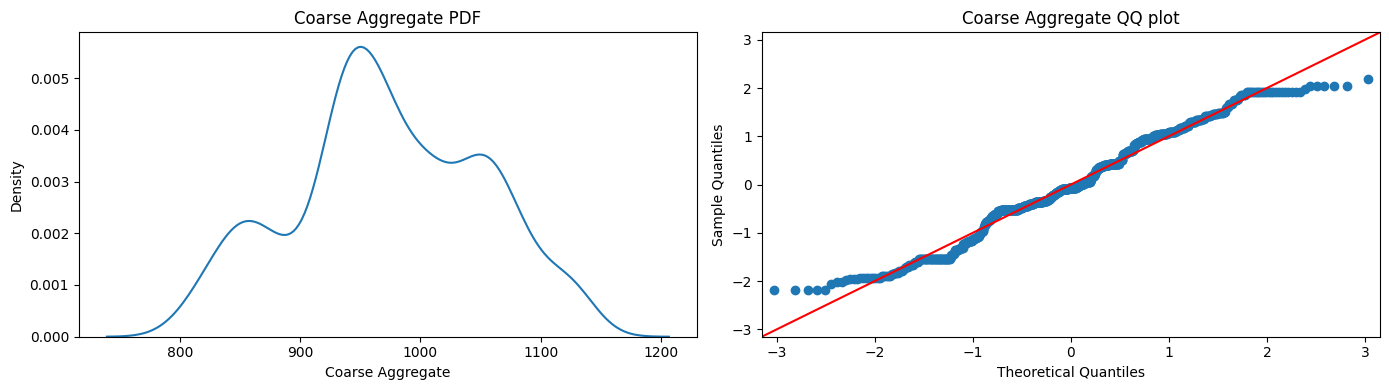

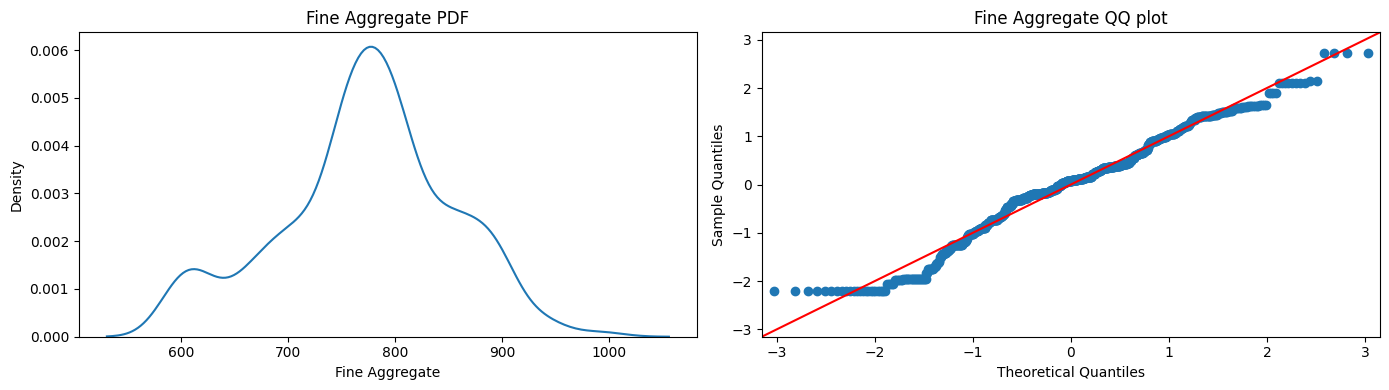

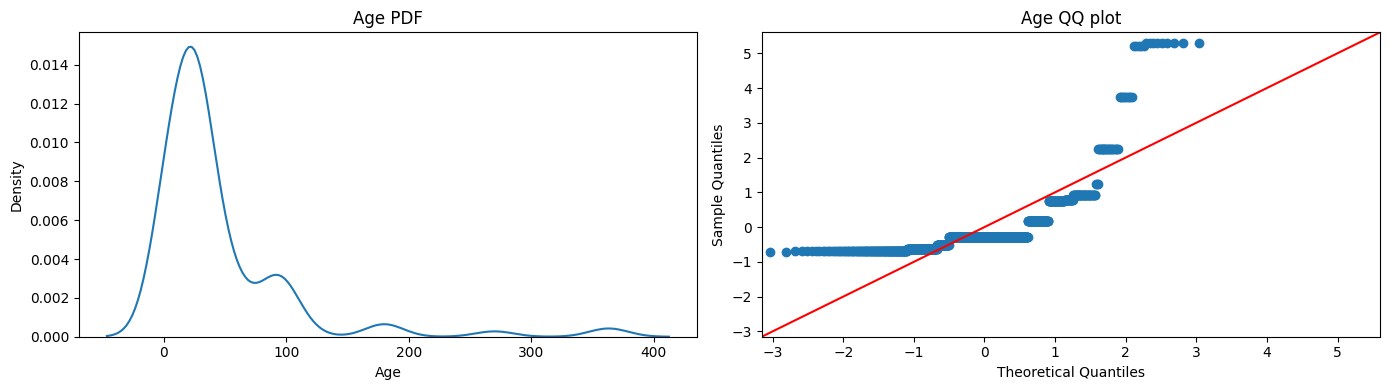

In [16]:
for col in temp.columns:
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    sns.kdeplot(X_train[col], ax=axs[0])
    axs[0].set_title(f"{col} PDF")

    sm.qqplot(X_train[col], line='45', fit=True, ax=axs[1])
    axs[1].set_title(f"{col} QQ plot")
    plt.tight_layout()
    plt.show()

In [17]:
pt1 = PowerTransformer(method='box-cox')
X_train_transformed = pt1.fit_transform(X_train + 0.0000001)
X_test_transformed = pt1.transform(X_test + 0.0000001)

In [31]:
pd.DataFrame({'cols' : X_train.columns, 'box_cox_Lambdas' : pt1.lambdas_})

,cols,box_cox_Lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772682
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [33]:
clf = LinearRegression()

clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.804253451341557

In [35]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(x + 0.0000001)

clf = LinearRegression()
np.mean(cross_val_score(clf, X_transformed, y, scoring='r2'))

np.float64(0.6658537952683784)

In [37]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

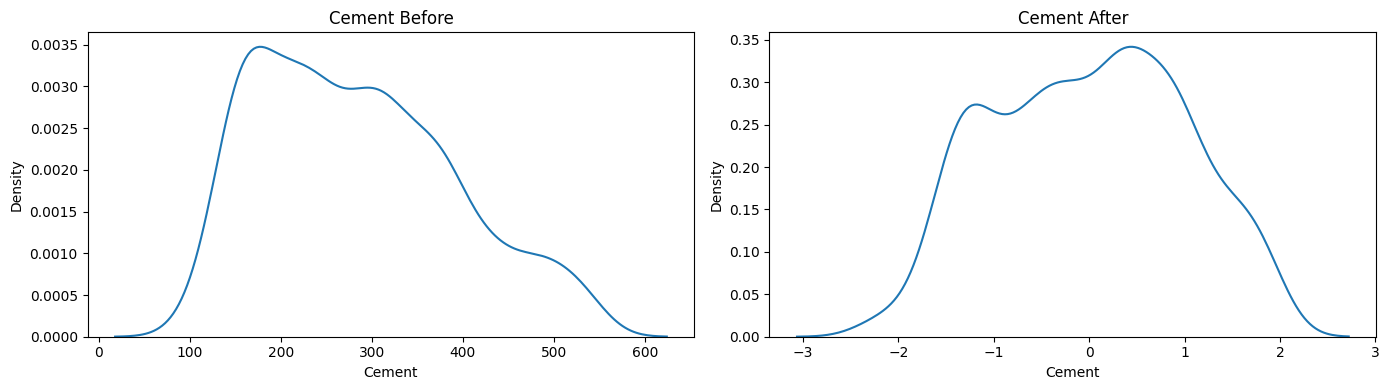

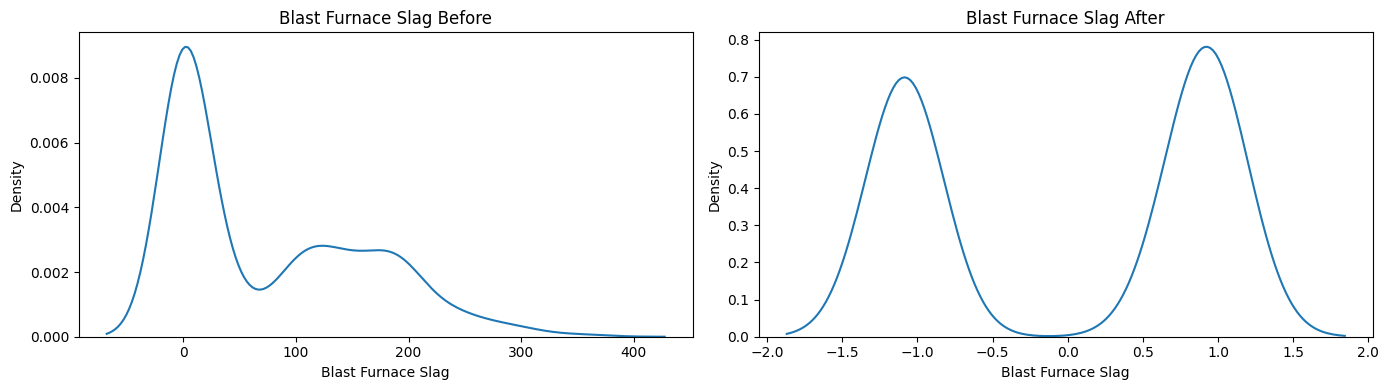

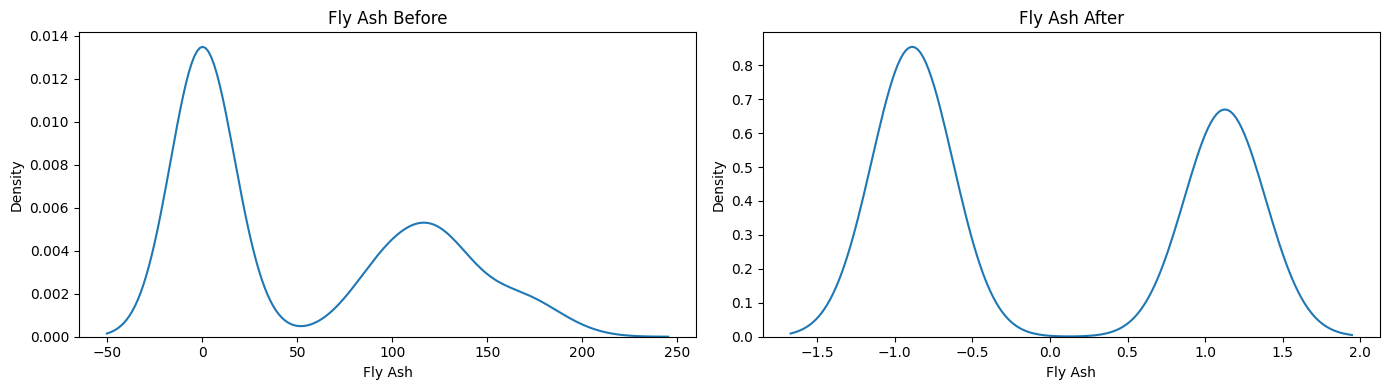

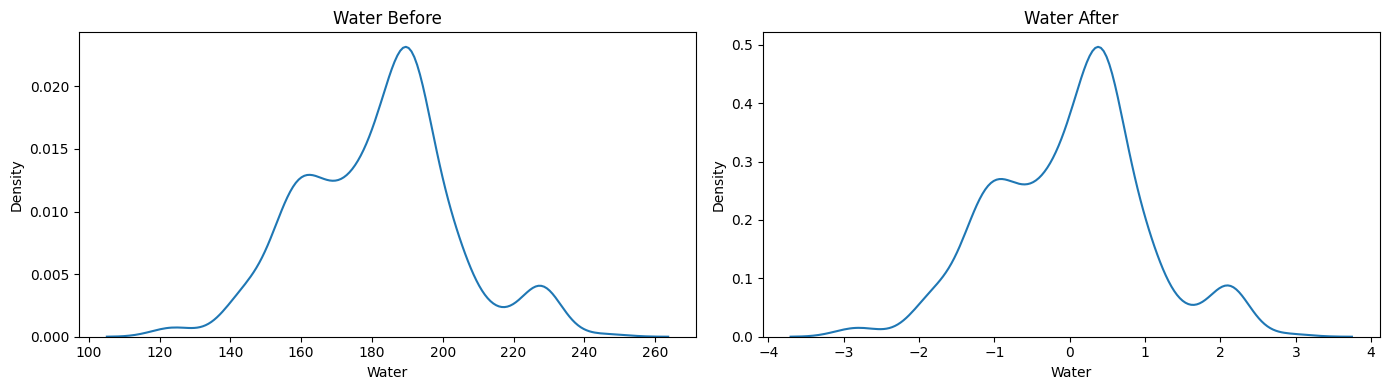

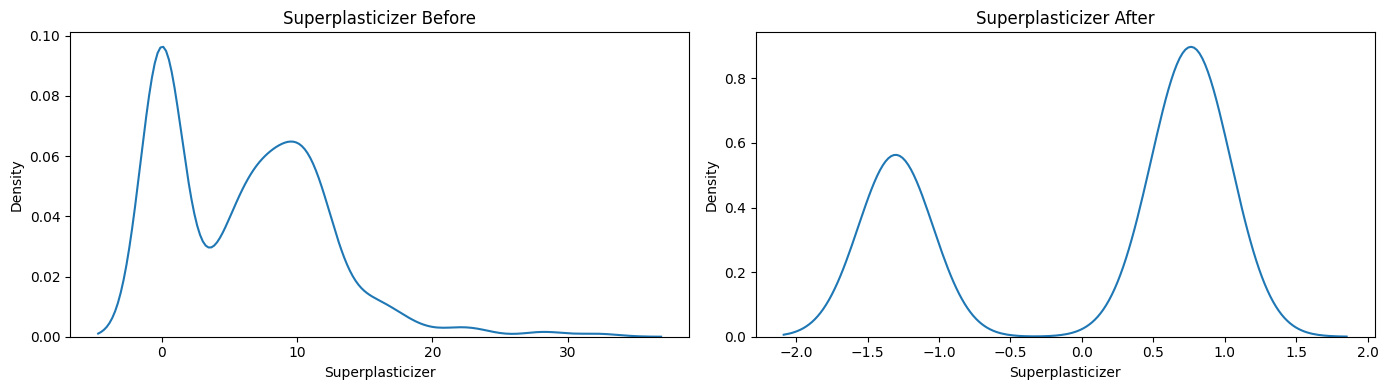

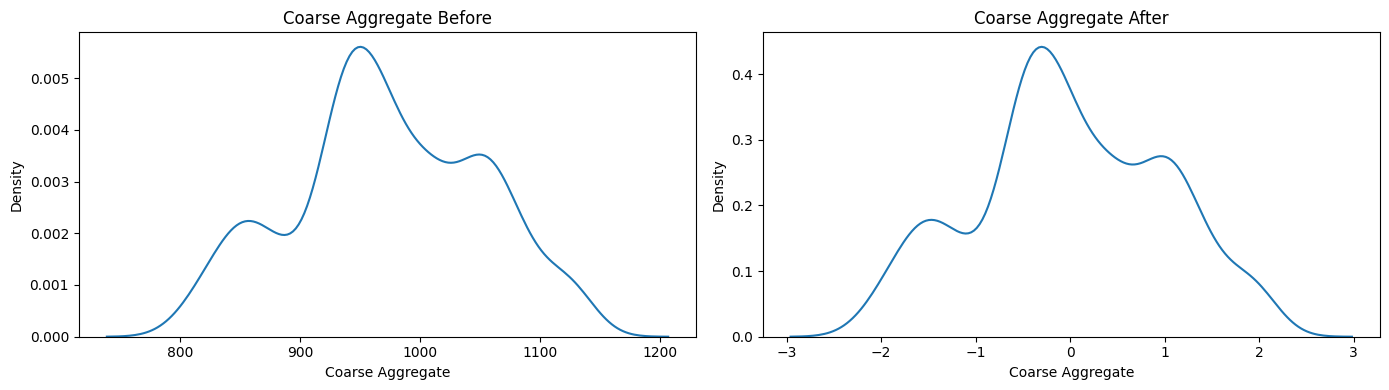

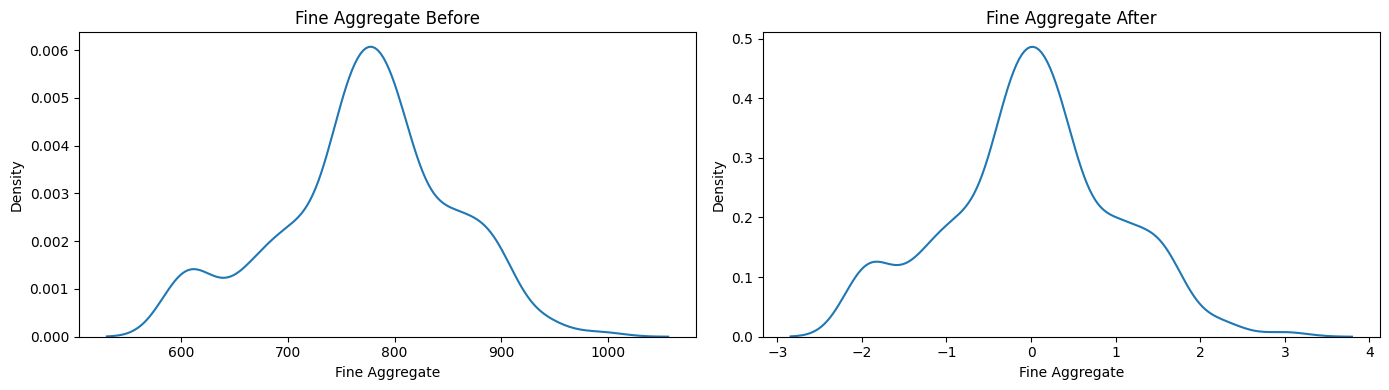

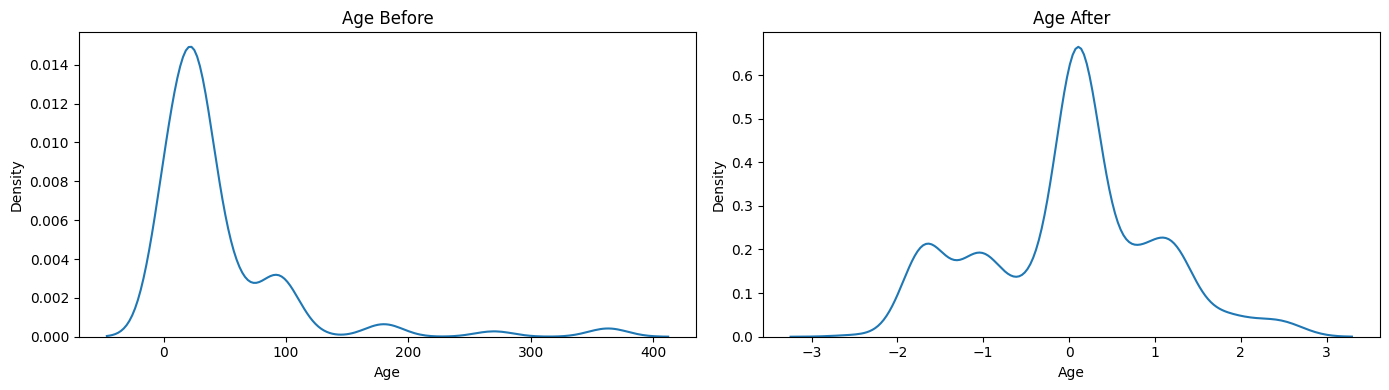

In [39]:
for col in X_train_transformed.columns:
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    sns.kdeplot(X_train[col], ax=axs[0])
    axs[0].set_title(f"{col} Before")

    sns.kdeplot(X_train_transformed[col], ax=axs[1])
    axs[1].set_title(f"{col} After")
    plt.tight_layout()
    plt.show()

In [40]:
pt2 = PowerTransformer()

X_train_transformed2 = pt2.fit_transform(X_train)
X_test_transformed2 = pt2.transform(X_test)

clf = LinearRegression()
clf.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
r2_score(y_test, y_pred)

0.8161906513339304

In [41]:
pt = PowerTransformer()
X_train_transformed_cross = pt.fit_transform(x)

clf = LinearRegression()
np.mean(cross_val_score(clf, X_train_transformed_cross, y, scoring='r2'))

np.float64(0.6834625134285748)

In [42]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

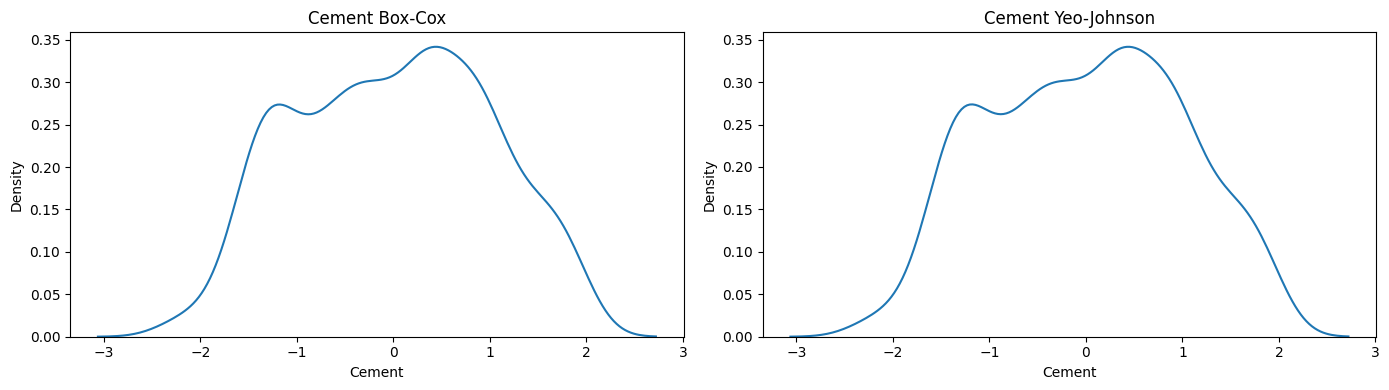

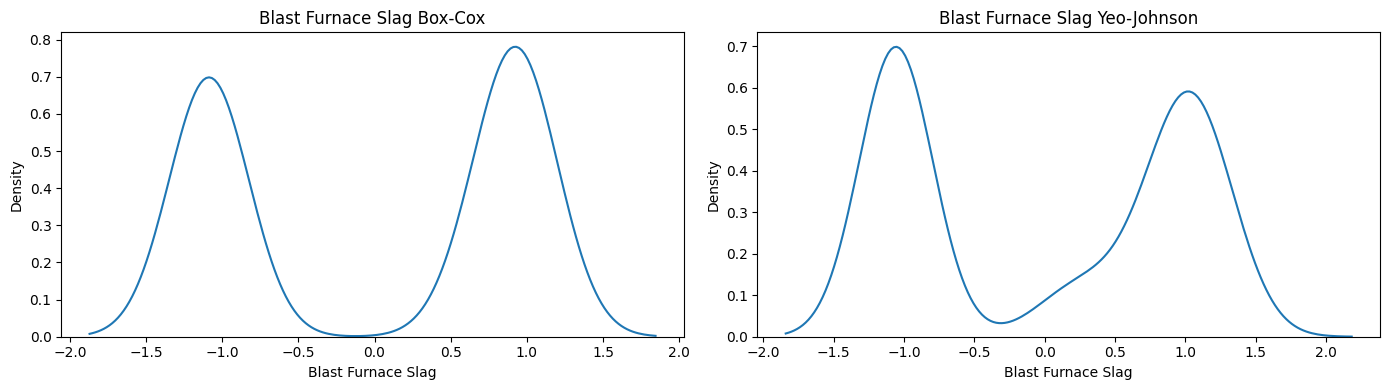

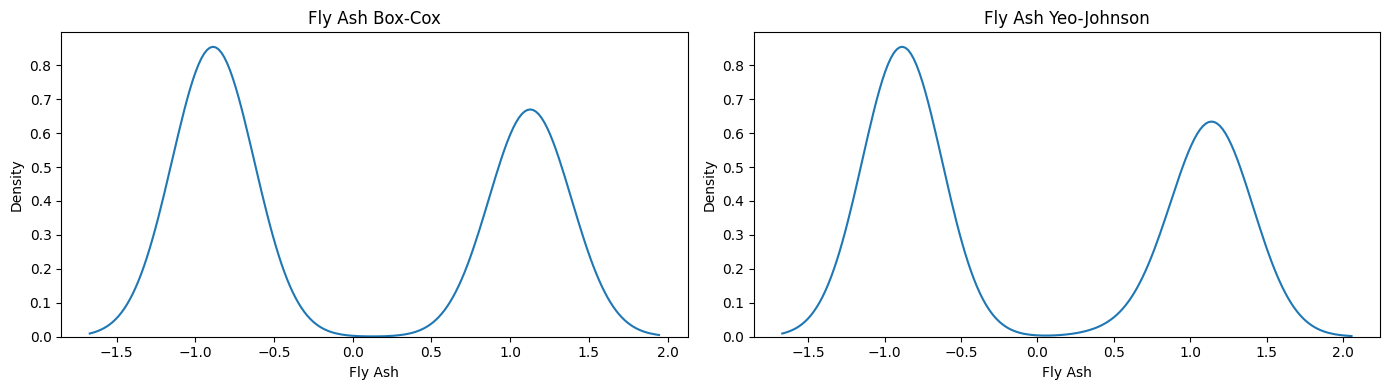

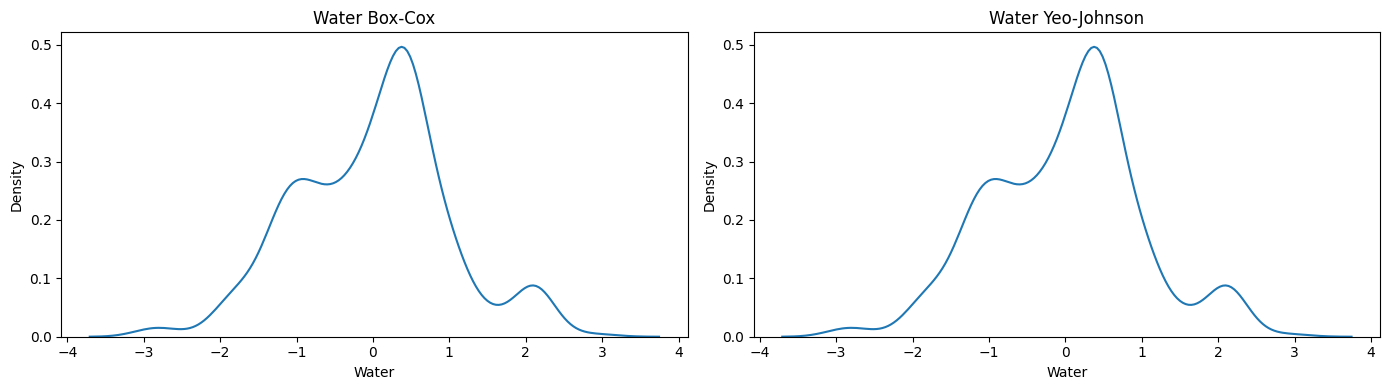

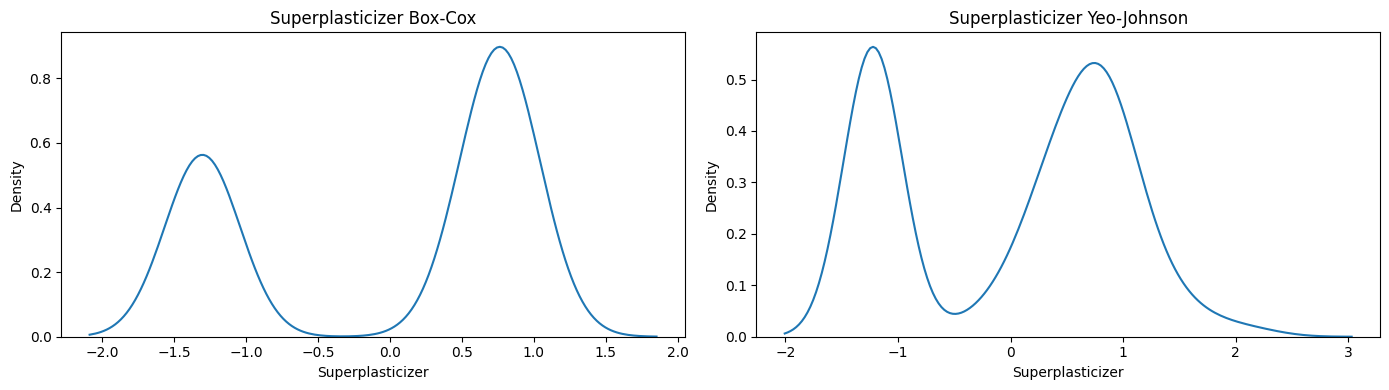

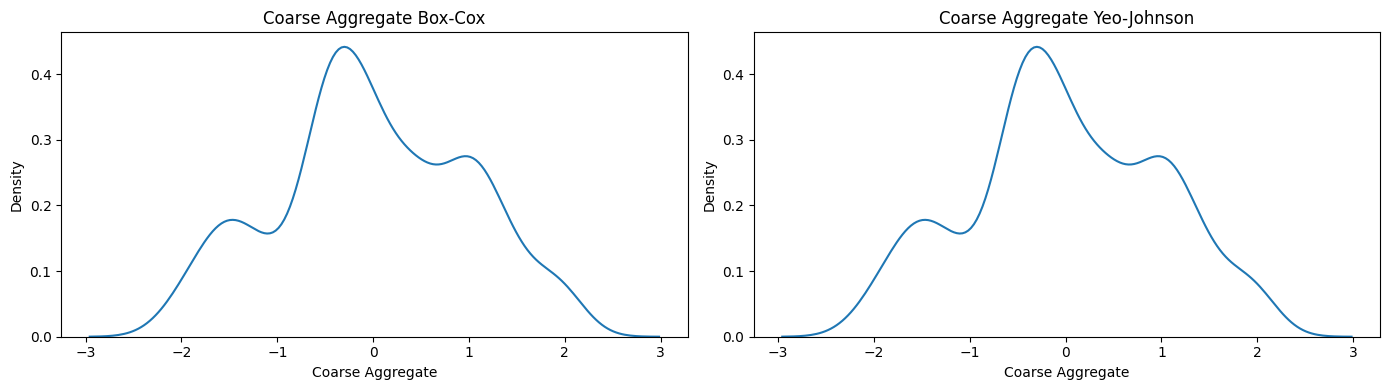

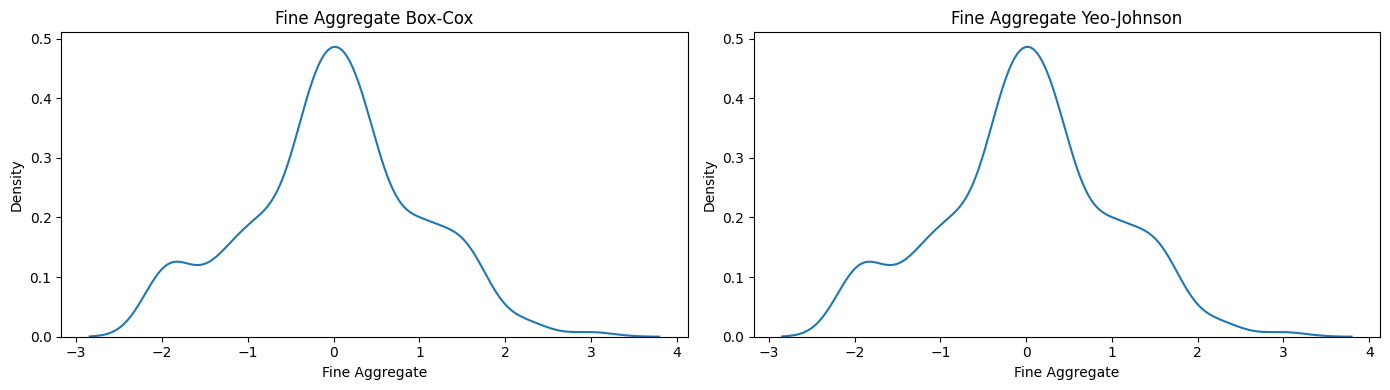

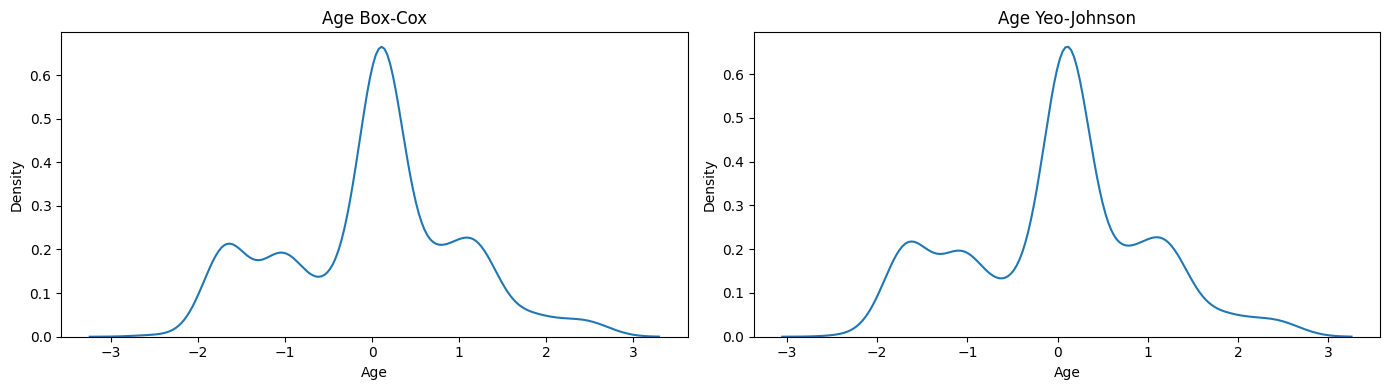

In [43]:
for col in X_train_transformed.columns:
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    sns.kdeplot(X_train_transformed[col], ax=axs[0])
    axs[0].set_title(f"{col} Box-Cox")

    sns.kdeplot(X_train_transformed2[col], ax=axs[1])
    axs[1].set_title(f"{col} Yeo-Johnson")
    plt.tight_layout()
    plt.show()

In [44]:
pd.DataFrame({'cols' : X_train.columns, 'box-cox Lambdas' : pt1.lambdas_, 'yeo-johnson Lambdas' : pt2.lambdas_})

,cols,box-cox Lambdas,yeo-johnson Lambdas
0,Cement,0.177025,0.174348
1,Blast Furnace Slag,0.022767,0.015715
2,Fly Ash,-0.034635,-0.161447
3,Water,0.772682,0.771307
4,Superplasticizer,0.087141,0.253935
5,Coarse Aggregate,1.129813,1.130050
6,Fine Aggregate,1.782018,1.783100
7,Age,0.066631,0.019885
